In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv("Beijing Air Quality0.csv",encoding='GBK')
raw_dataset=dataset.to_numpy()

In [3]:
#data preprocessing
AQI=raw_dataset[:,[1]]
Train=raw_dataset[:,1:]
print(Train.shape)
scaleX=MinMaxScaler()
scaleX.fit(Train)
Train=scaleX.transform(Train)

sample=np.empty([2997,35])
for i in range(2997):
  sample[i,0:7]=Train[i,:]
  sample[i,7:14]=Train[i+1,:]
  sample[i,14:21]=Train[i+2,:]
  sample[i,21:28]=Train[i+3,:]
  sample[i,28:35]=Train[i+4,:]

(3002, 7)


In [4]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(sample, AQI[5:3002], test_size=0.2, random_state = 0)

In [5]:
#defining the model
model = MLPRegressor(hidden_layer_sizes = (100, 80, 50, 40, 10), activation = 'relu', solver = 'adam', max_iter=100 )

In [6]:
#choosing the paarmeters
parameters = {
    'hidden_layer_sizes': [(50, 40, 30, 20, 10), (100, 80, 50, 40, 10)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

Best parameters are: {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (100, 80, 50, 40, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}
    Actual   Predicted
0       52   68.699887
1       49   56.276848
2       61  128.964267
3      206  129.410730
4       68   45.797051
..     ...         ...
595     47   46.722454
596     38   60.612199
597    142  113.990166
598     37   50.460970
599     27   48.920690

[600 rows x 2 columns]


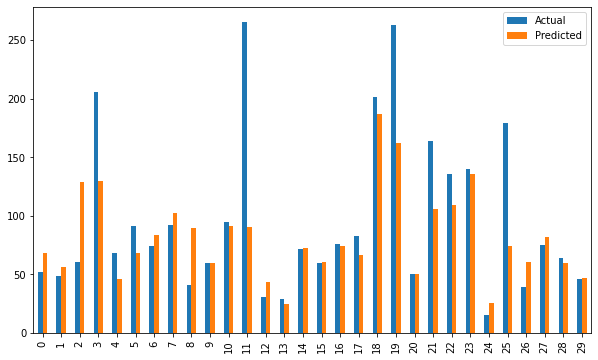

In [7]:
#best parameters using gridsearchcv
mlp_gridsearchcv = GridSearchCV(model, parameters, n_jobs=-1, cv=3)
mlp_gridsearchcv.fit(X_train, y_train)
print('Best parameters are:', mlp_gridsearchcv.best_params_)
predictions = mlp_gridsearchcv.predict(X_test) 
df_temp2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predictions.flatten()})
df_temp2.head()
print(df_temp2)
#plotting the first 30 data points
df_temp2 = df_temp2.head(30)
df_temp2.plot(kind='bar',figsize=(10,6))
plt.legend()
plt.show()

In [11]:
#evaluating the model

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
score = mlp_gridsearchcv.score(X_test, y_test)
print('Test Score:',score)
score1 = mlp_gridsearchcv.score(X_train, y_train)
print('Train Score:', score1)

Mean Absolute Error: 29.145971936142026
Mean Squared Error: 1872.822456507165
Root Mean Squared Error: 43.27611877822646
Test Score: 0.44057712303021346
Train Score: 0.4773694669601859


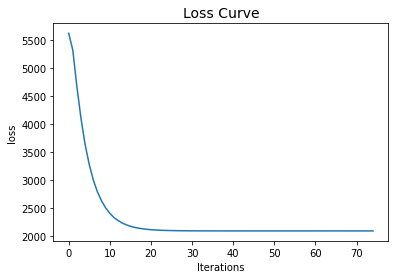

In [26]:
model1 = MLPRegressor(hidden_layer_sizes = (100, 80, 50, 40, 10), activation = 'relu', solver = 'sgd', max_iter=100 )
model1.fit(X_train, y_train)
# #plotting the model loss curve
plt.plot(model1.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('loss')
plt.show()


<function matplotlib.pyplot.show>

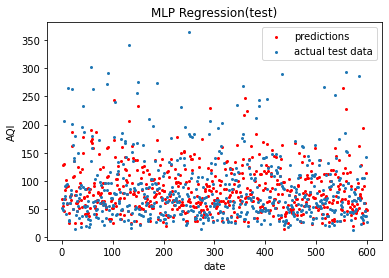

In [13]:
#plotting the predictions
fig = plt.figure()
X=np.linspace(1,600,num=600).reshape(-1,1)
#print(Min_TEMP_pred.shape)
plt.title('MLP Regression(test)')
plt.scatter(X,predictions,color='red',s=4)
plt.scatter(X,y_test,s=4)
plt.xlabel('date')
plt.ylabel('AQI')
plt.legend(['predictions', 'actual test data'])
plt.show

(DummyBaseline)mean_squared_error: 3357.2074971427
(DummyBaseline)mean_absolute_error: 43.4112136353542
(DummyBaseline)Root Mean Squared Error: 57.94141435228087


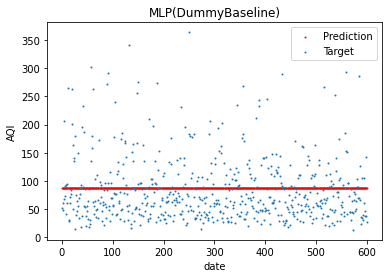

In [10]:
#baseline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
meanAQI=sum(AQI)/len(AQI)
Dummy=[]
for i in range(0,600):
    Dummy.append(meanAQI)
print('(DummyBaseline)mean_squared_error:',mean_squared_error(y_test,Dummy))
print('(DummyBaseline)mean_absolute_error:',mean_absolute_error(y_test,Dummy))
print('(DummyBaseline)Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,Dummy)))
plt.title('MLP(DummyBaseline)')
plt.xlabel('date')
plt.ylabel('AQI')
plt.scatter(X,Dummy,color='red',s=1)
plt.scatter(X,y_test,s=1)
plt.legend(['Prediction','Target'],loc='upper right')
